<h1> Smoke Dection | Ensemble Models | 100% Model Accuracy </h1>

<h2>Importing Libraries</h2>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.interpolate import make_interp_spline


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tt
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

from sklearn.tree import ExtraTreeClassifier , DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import time        
import warnings
warnings.filterwarnings("ignore")

/kaggle/input/smoke-detection-dataset/smoke_detection_iot.csv


<h2> Exploratorary Data Analysis </h2>

In [2]:
df = pd.read_csv('../input/smoke-detection-dataset/smoke_detection_iot.csv')
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
df.shape

(62630, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [5]:
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


<b>Removing Features :- 'Unnamed:0' , 'UTC' , 'CNT'</b> as they arent important or relevant for modeling or analysis 

In [6]:
df_smokeDetection = df.iloc[:, 2:-2]
df_smokeDetection['FireAlarm'] = df['Fire Alarm']
df_smokeDetection.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,FireAlarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [7]:
feature_names = []
for name in df_smokeDetection.columns:
    feature_names.append(name)

feature_names.remove('FireAlarm')
print(feature_names)

['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']


<h2>Data Visualization </h2>

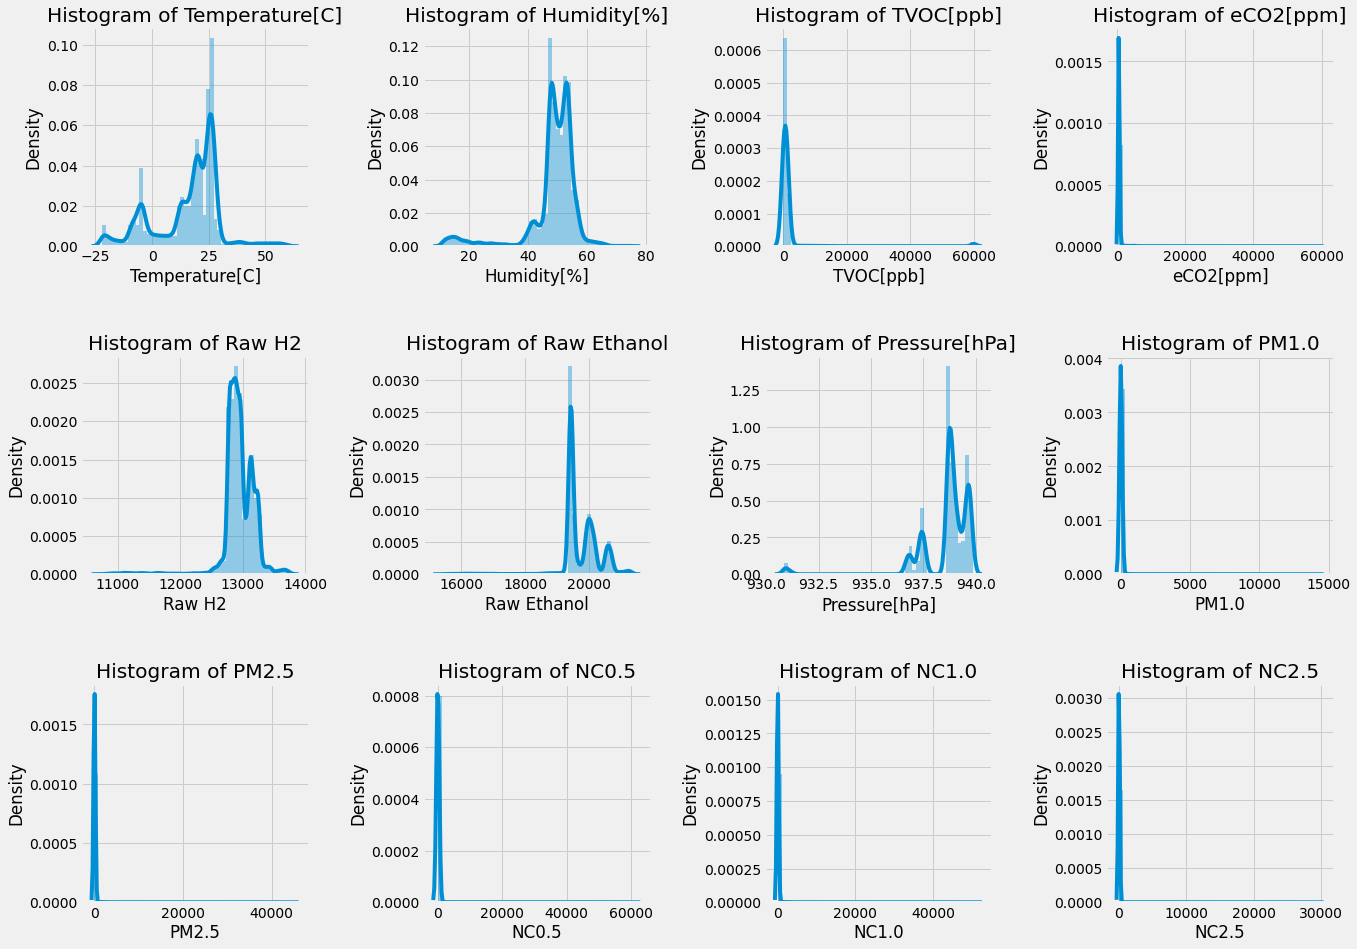

In [8]:
plt.style.use('fivethirtyeight')

plt.figure(1 , figsize = (20 , 15))

n = 0
for x in feature_names:
    
    n += 1
    plt.subplot(3 , 4 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    #plt.hist(df[x], bins = 50)
    sns.distplot(a = df_smokeDetection[x] , bins = 50 )
    plt.title('Histogram of {}'.format(x))
    
plt.show()

<h2>Correlation Matrix</h2>

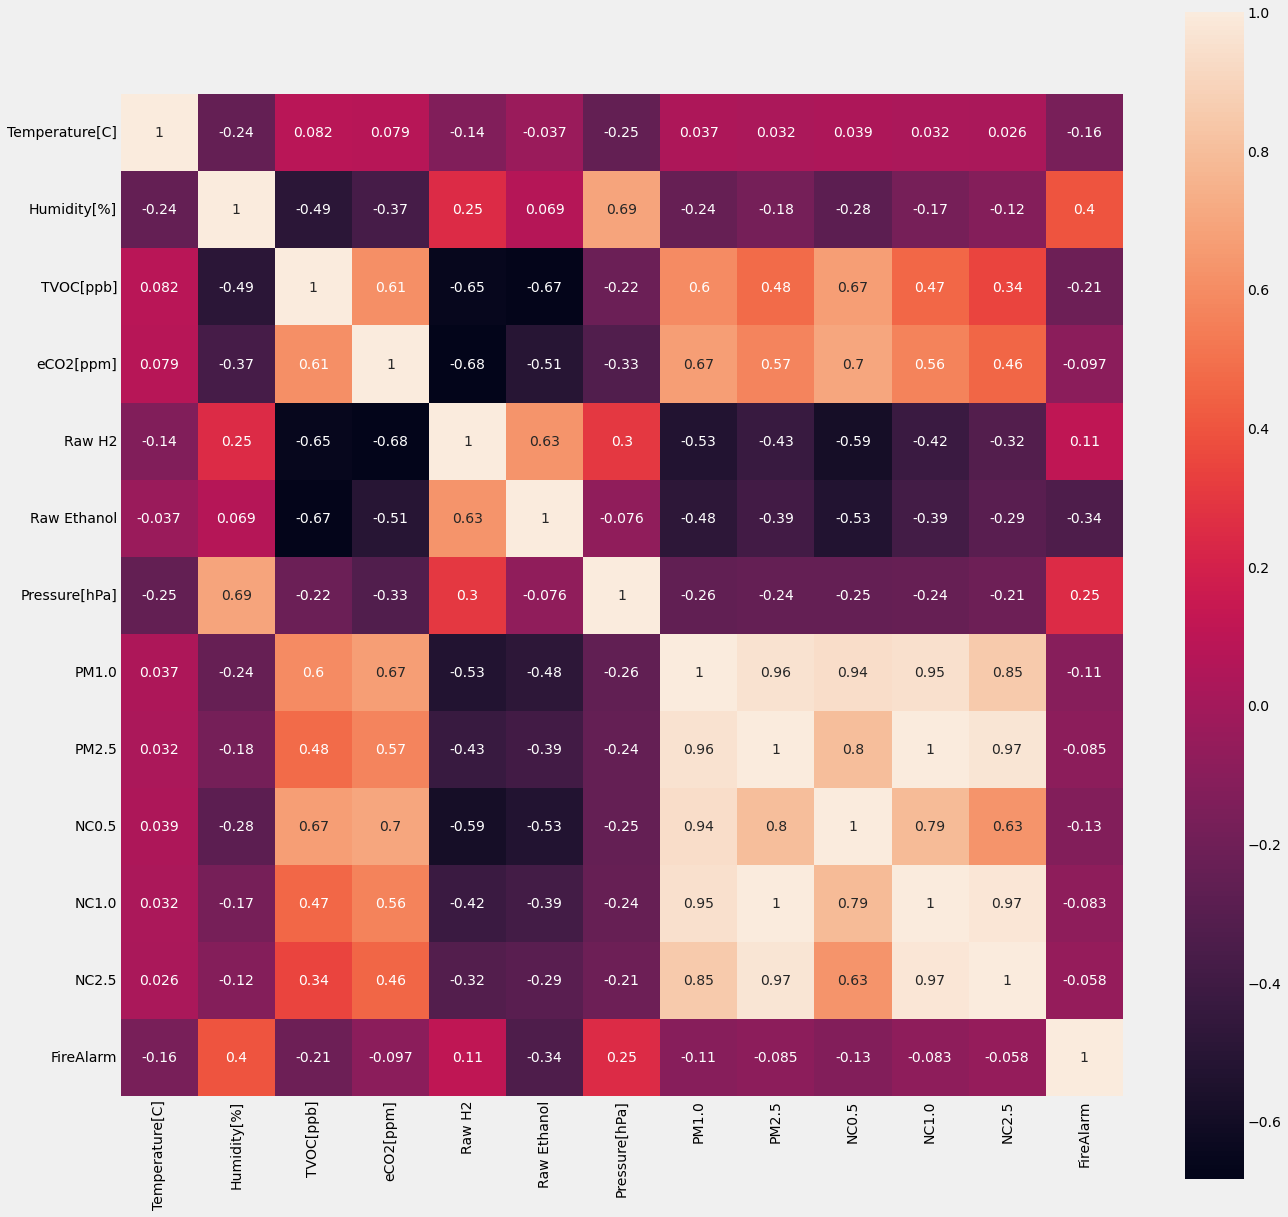

In [9]:
cor = df_smokeDetection.corr()

plt.figure(1 , figsize = (20 , 20))
sns.heatmap(cor , annot = True , square = True)
plt.show()

<h2>Scatter Plot - To visualize the relation and behavior</h2>

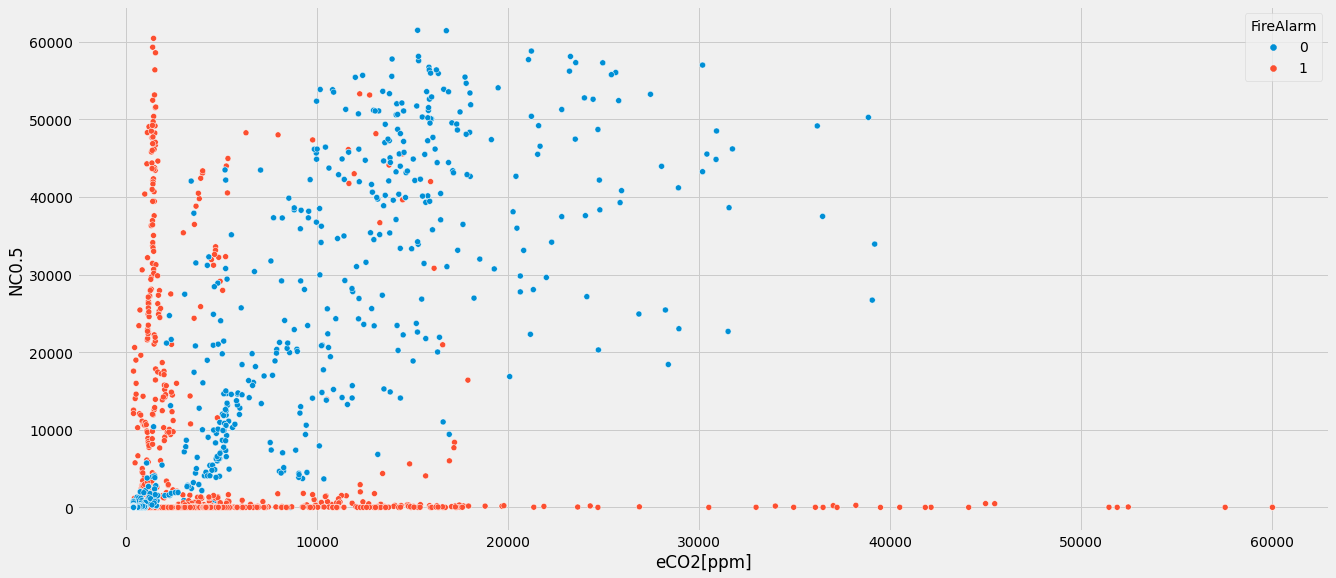

In [10]:
plt.figure(1 , figsize = (20 , 9))

sns.scatterplot(x = 'eCO2[ppm]' , y  = 'NC0.5' , hue = 'FireAlarm' , data = df_smokeDetection)
plt.show()

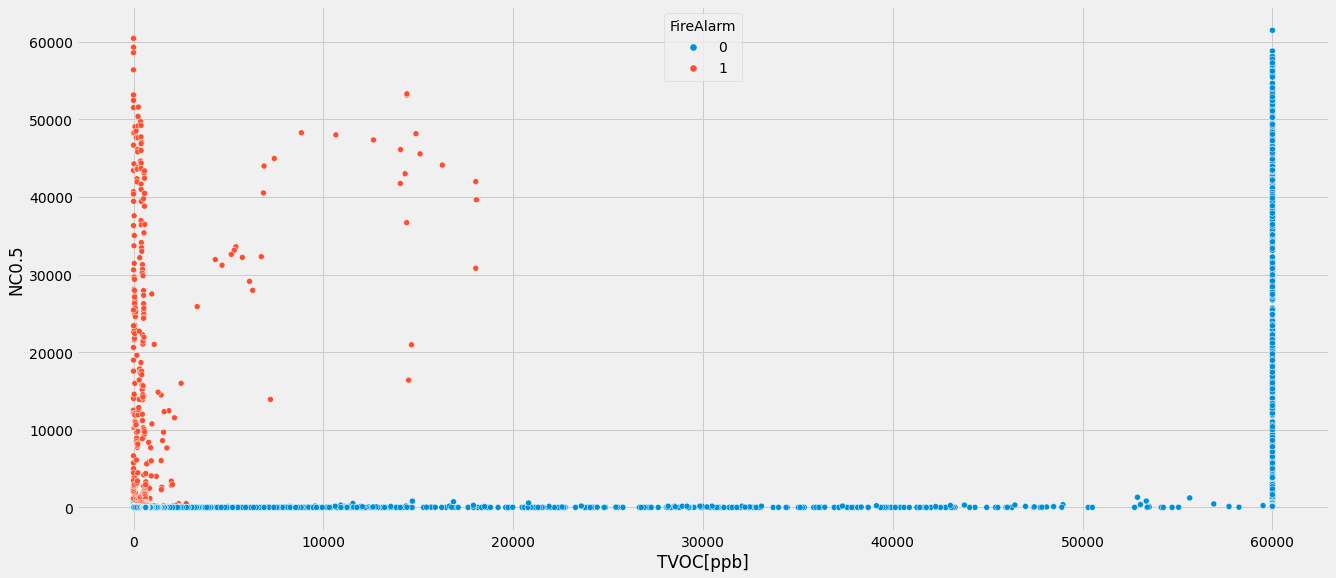

In [11]:
plt.figure(1 , figsize = (20 , 9))

sns.scatterplot(x = 'TVOC[ppb]' , y  = 'NC0.5' , hue = 'FireAlarm' , data = df_smokeDetection)
plt.show()

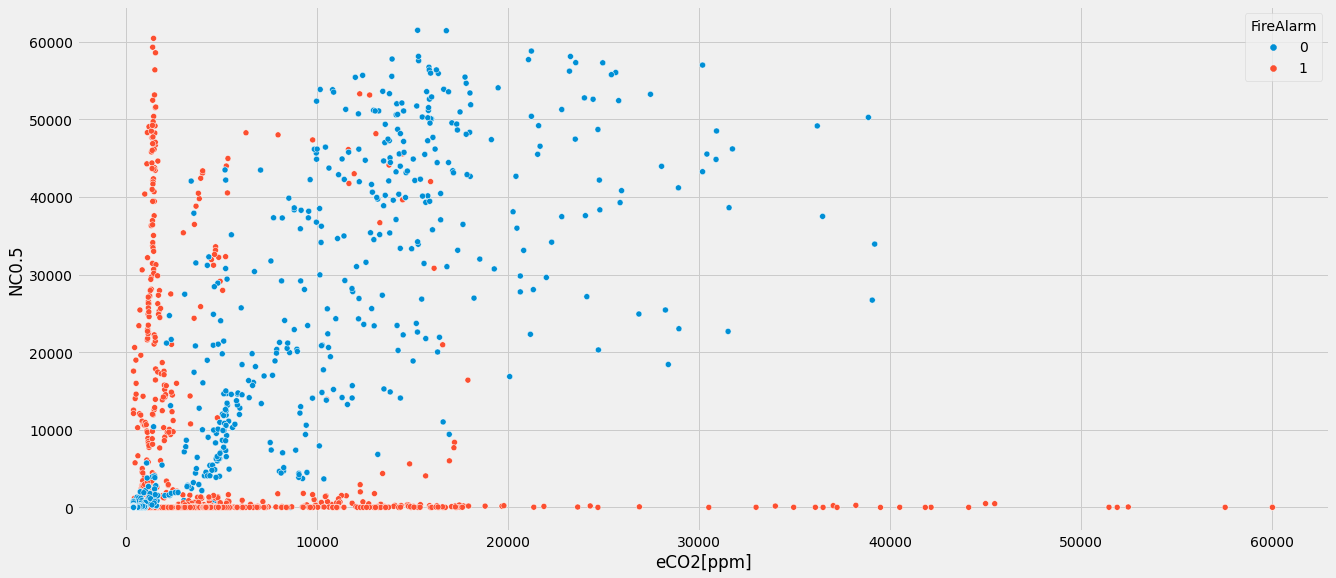

In [12]:
plt.figure(1 , figsize = (20 , 9))

sns.scatterplot(x = 'eCO2[ppm]' , y  = 'NC0.5' , hue = 'FireAlarm' , data = df_smokeDetection)
plt.show()

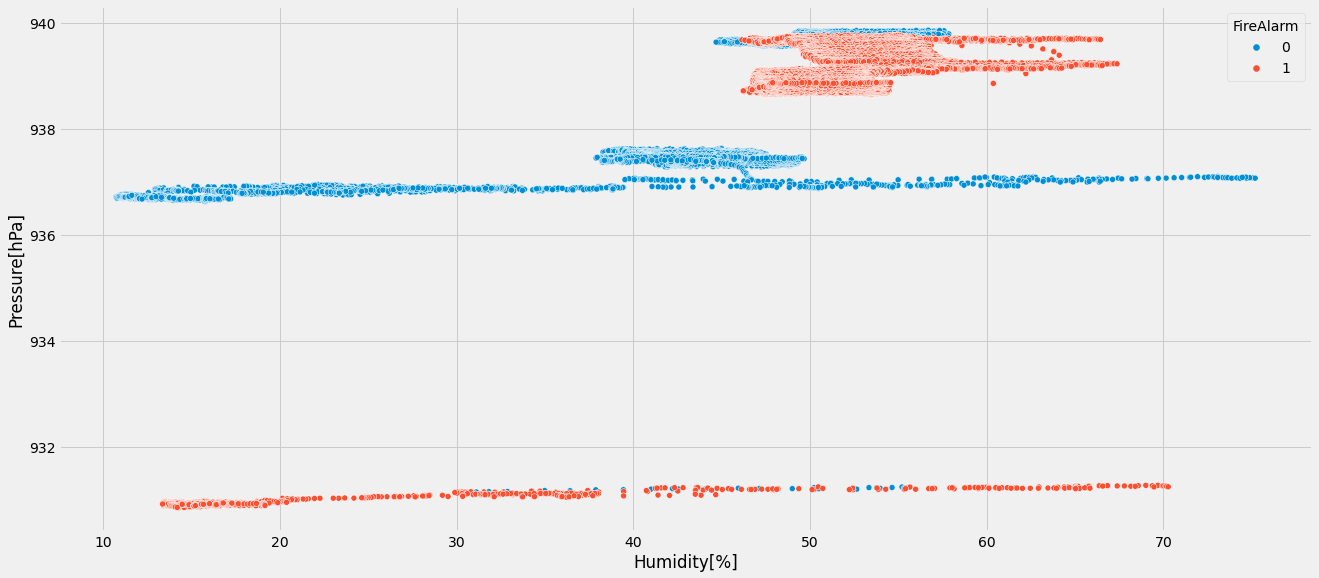

In [13]:
plt.figure(1 , figsize = (20 , 9))

sns.scatterplot(x = 'Humidity[%]' , y  = 'Pressure[hPa]' , hue = 'FireAlarm' , data = df_smokeDetection)
plt.show()

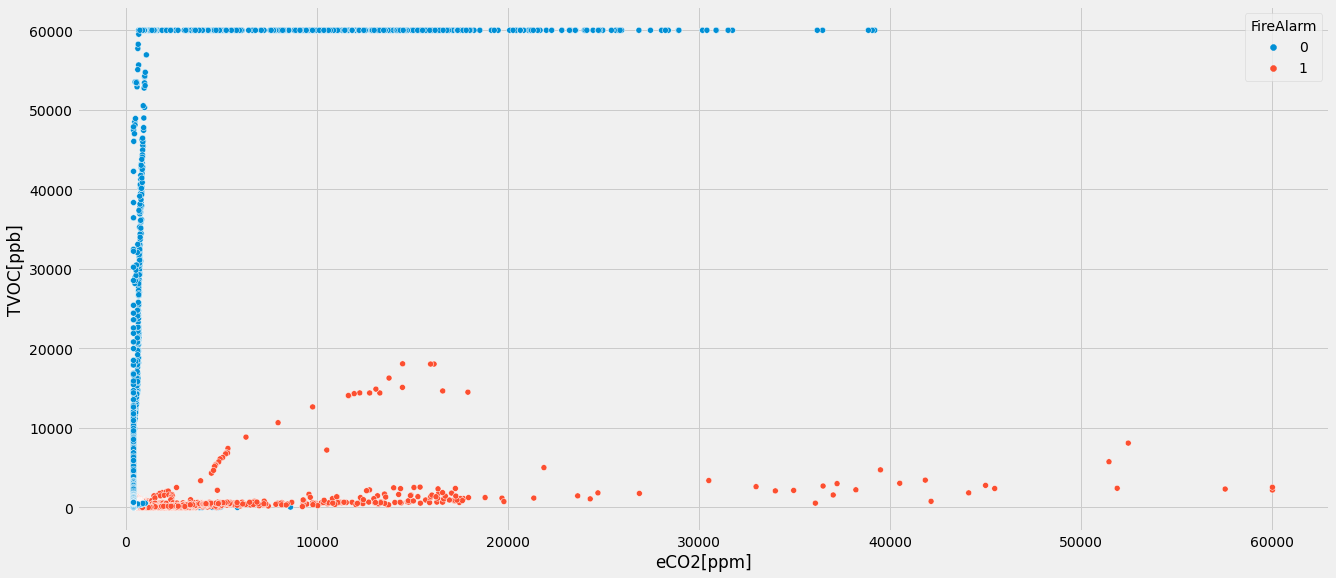

In [14]:
plt.figure(1 , figsize = (20 , 9))

sns.scatterplot(x = 'eCO2[ppm]' , y  = 'TVOC[ppb]' , hue = 'FireAlarm' , data = df_smokeDetection)
plt.show()

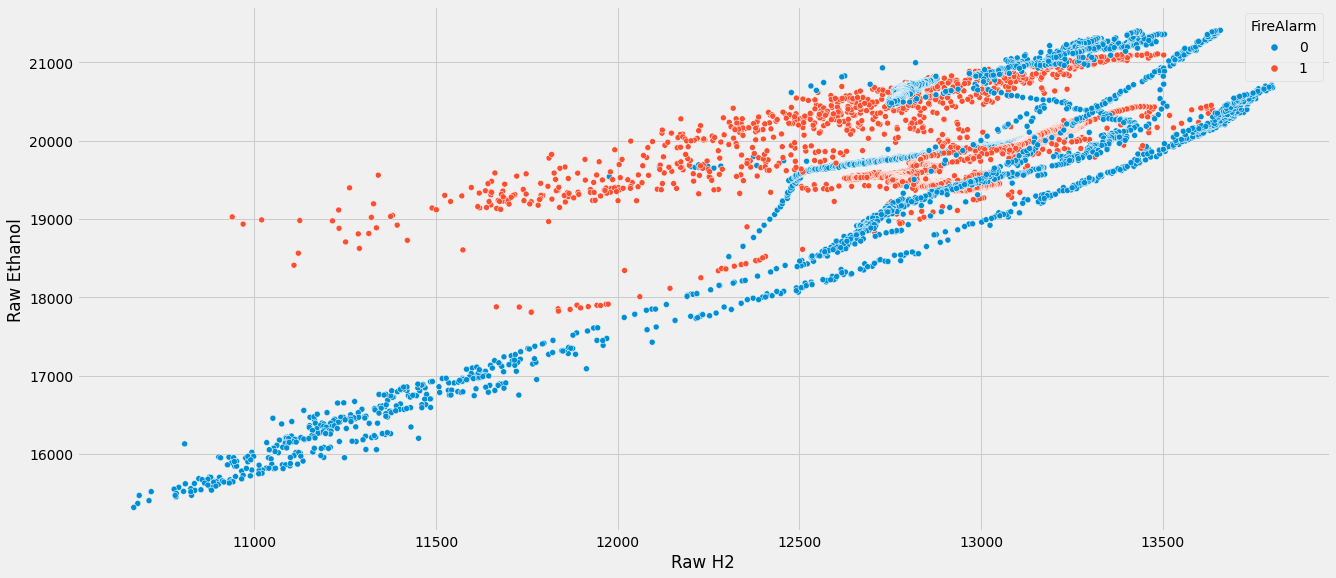

In [15]:
plt.figure(1 , figsize = (20 , 9))

sns.scatterplot(x = 'Raw H2' , y  = 'Raw Ethanol' , hue = 'FireAlarm' , data = df_smokeDetection)
plt.show()

<h2> Data Preprocessing </h2>

In [16]:
x = df_smokeDetection.iloc[: , :-1]
y = df_smokeDetection.iloc[: , -1]

xtrain , xtest , ytrain , ytest = tt(x , y ,
                                    test_size = 0.3 , 
                                    random_state = 20)

In [17]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

* Modeling
<h1>RandomForest Classifier</h1>

In [18]:
accuracy = []
n_estimators = []

cnt = 0
for i in range(1,151):
    cnt += 1
    n = i
    n_estimators.append(n)
    
    rndCLF = RandomForestClassifier(n_estimators = n , criterion = 'entropy' , max_depth = 4 , 
                                    max_features = 'sqrt' , bootstrap = True , n_jobs = -1 , max_samples = 5000)
    rndCLF.fit(xtrain , ytrain)
    yPred = rndCLF.predict(xtest)
    accuracy.append(accuracy_score(ytest , yPred))
    
    if cnt == 10:
        print('RandomForest Classifier with n_estimators = {} ------------> Accuracy : {}'.format(n ,accuracy_score(ytest , yPred) ))
        cnt = 0 
    else:
        pass 

RandomForest Classifier with n_estimators = 10 ------------> Accuracy : 0.9939326201500878
RandomForest Classifier with n_estimators = 20 ------------> Accuracy : 0.995050295385598
RandomForest Classifier with n_estimators = 30 ------------> Accuracy : 0.9963276385118952
RandomForest Classifier with n_estimators = 40 ------------> Accuracy : 0.9948906274948108
RandomForest Classifier with n_estimators = 50 ------------> Accuracy : 0.994784182234286
RandomForest Classifier with n_estimators = 60 ------------> Accuracy : 0.9922827186119538
RandomForest Classifier with n_estimators = 70 ------------> Accuracy : 0.997125977965831
RandomForest Classifier with n_estimators = 80 ------------> Accuracy : 0.9947309596040236
RandomForest Classifier with n_estimators = 90 ------------> Accuracy : 0.9952099632763851
RandomForest Classifier with n_estimators = 100 ------------> Accuracy : 0.9932407259566768
RandomForest Classifier with n_estimators = 110 ------------> Accuracy : 0.9951567406461227


<h2>Number of Estimators V/S Accuracy</h2>

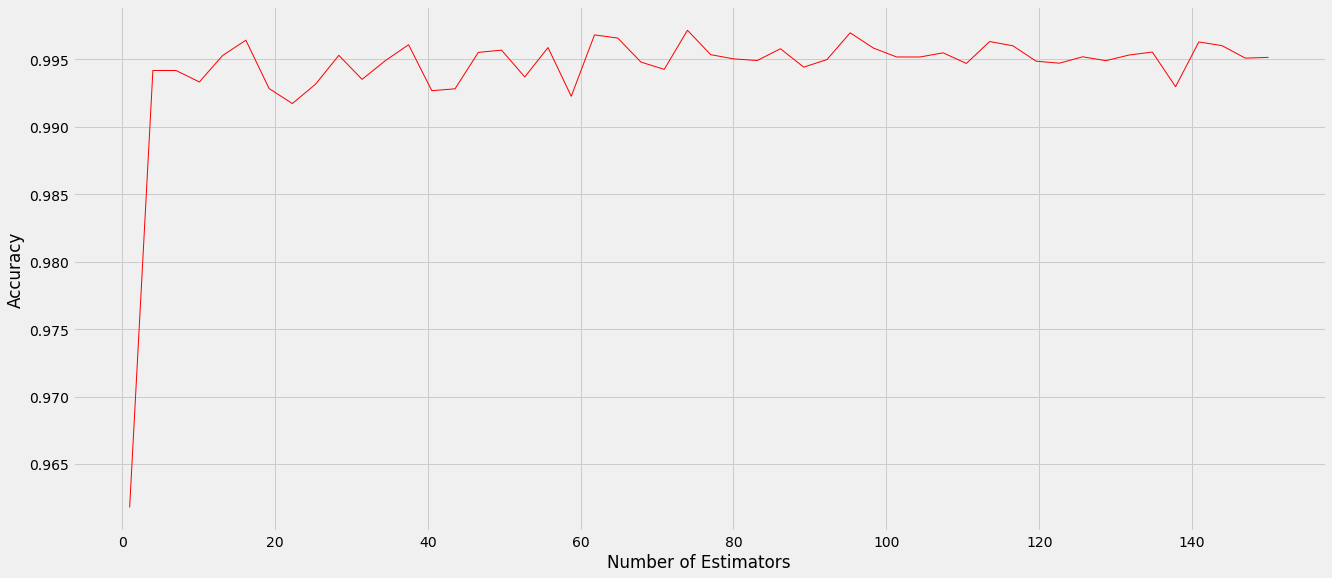

In [19]:
plt.figure(1 , figsize = (20 , 9))

accuracySmooth = make_interp_spline(n_estimators , accuracy)
n_estimatorsSmooth = np.linspace(np.array(n_estimators).min() , np.array(n_estimators).max() , 50)
accuracySmooth = accuracySmooth(n_estimatorsSmooth)


plt.plot(n_estimatorsSmooth , accuracySmooth,'r-' , linewidth=1)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')


plt.show()

In [20]:
'''To Store every Models Performance'''
modelName = []
timeTaken = []
modelAccuracy = []

In [21]:
start = time.time()

randomForest = RandomForestClassifier(n_estimators = 125 , criterion = 'entropy' , max_depth = 4 , 
                                      max_features = 'sqrt' , bootstrap = True , n_jobs = -1 , 
                                      max_samples = 5000 )

randomForest.fit(xtrain , ytrain)
yPred_RandomForest = randomForest.predict(xtest)
end = time.time()


modelName.append('RandomForest Classifier')
timeTaken.append(end - start)
modelAccuracy.append(accuracy_score(ytest , yPred_RandomForest))

In [22]:
def Report(ytest , ypred):
    print('Accuracy : {} \n'.format(accuracy_score(ytest , ypred)))
    print('Confusion Matrix : \n\n{}\n'.format(confusion_matrix(ytest , ypred)))
    print('Classification Report : \n\n{}'.format(classification_report(ytest , ypred)))
    
Report(ytest  , yPred_RandomForest)

Accuracy : 0.9948374048645484 

Confusion Matrix : 

[[ 5316    14]
 [   83 13376]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5330
           1       1.00      0.99      1.00     13459

    accuracy                           0.99     18789
   macro avg       0.99      1.00      0.99     18789
weighted avg       0.99      0.99      0.99     18789



<h1> ExtraTree Classification </h1>

In [23]:
accuracy = []
max_depth = []

cnt = 0 
for d in range(1 , 101):

    max_depth.append(d)
    cnt += 1
    
    extraTreeCLF = ExtraTreeClassifier(criterion = 'entropy' , splitter = 'random' , max_depth = d , 
                                       max_features = 'sqrt' , random_state = 0 ) 
    extraTreeCLF.fit(xtrain , ytrain)
    yPred = extraTreeCLF.predict(xtest)
    accuracy.append(accuracy_score(ytest , yPred))
    
    if cnt == 10:
        print('ExtraTree Classifier with max_depth = {} ------------> Accuracy : {}'.format(d ,accuracy_score(ytest , yPred) ))
        cnt = 0
    else :
        pass

ExtraTree Classifier with max_depth = 10 ------------> Accuracy : 0.9874394592580765
ExtraTree Classifier with max_depth = 20 ------------> Accuracy : 0.9770610463569109
ExtraTree Classifier with max_depth = 30 ------------> Accuracy : 0.9987226568737027
ExtraTree Classifier with max_depth = 40 ------------> Accuracy : 0.9987226568737027
ExtraTree Classifier with max_depth = 50 ------------> Accuracy : 0.9987226568737027
ExtraTree Classifier with max_depth = 60 ------------> Accuracy : 0.9987226568737027
ExtraTree Classifier with max_depth = 70 ------------> Accuracy : 0.9987226568737027
ExtraTree Classifier with max_depth = 80 ------------> Accuracy : 0.9987226568737027
ExtraTree Classifier with max_depth = 90 ------------> Accuracy : 0.9987226568737027
ExtraTree Classifier with max_depth = 100 ------------> Accuracy : 0.9987226568737027


<h2>Number of Estimators V/S Accuracy</h2>

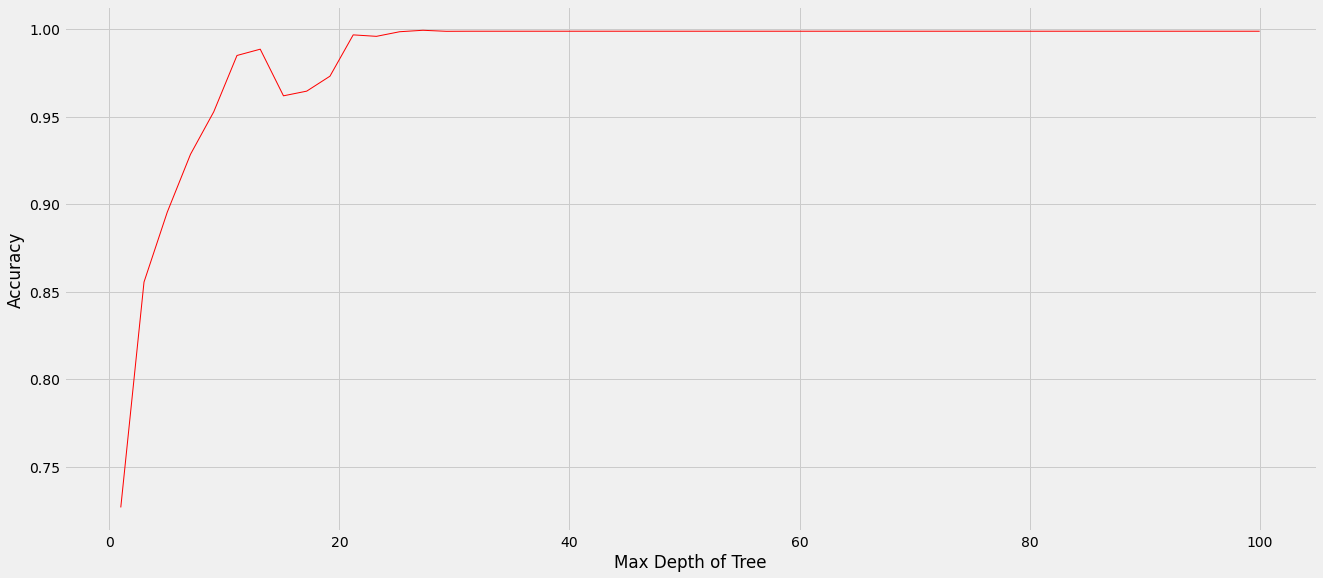

In [24]:
plt.figure(1 , figsize = (20 , 9))

accuracySmooth = make_interp_spline(max_depth , accuracy)
max_depthSmooth = np.linspace(np.array(max_depth).min() , np.array(max_depth).max() , 50)
accuracySmooth = accuracySmooth(max_depthSmooth)

plt.plot(max_depthSmooth , accuracySmooth,'r-' , linewidth=1)
plt.xlabel('Max Depth of Tree')
plt.ylabel('Accuracy')
plt.show()

In [25]:
start = time.time()

ExtraTreeCLF = ExtraTreeClassifier(criterion = 'entropy' , splitter = 'random' , max_depth = 50 , 
                                   max_features = 'sqrt' , random_state = 0 ) 
ExtraTreeCLF.fit(xtrain , ytrain)
yPred_ExtraTreeCLF = ExtraTreeCLF.predict(xtest)

end = time.time()

modelName.append('ExtraTree Classifier')
timeTaken.append(end - start)
modelAccuracy.append(accuracy_score(ytest , yPred_ExtraTreeCLF))

In [26]:
Report(ytest , yPred_ExtraTreeCLF)

Accuracy : 0.9987226568737027 

Confusion Matrix : 

[[ 5321     9]
 [   15 13444]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5330
           1       1.00      1.00      1.00     13459

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



<h1> AdaBoost Classifier </h1>

In [27]:
accuracy = []
n_estimators = []

cnt = 0
for i in range(1,81):
    cnt += 1
    n = i
    n_estimators.append(n)
    
    adaBoost = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1) , n_estimators = n , 
                                  learning_rate = 0.5 , algorithm = 'SAMME.R' , random_state = 0)
    
    adaBoost.fit(xtrain , ytrain)
    yPred = adaBoost.predict(xtest)
    accuracy.append(accuracy_score(ytest , yPred))
    
    if cnt == 10:
        print('AdaBoost Classifier with n_estimators = {} ------------> Accuracy : {}'.format(n ,accuracy_score(ytest , yPred) ))
        cnt = 0 
    else:
        pass 

AdaBoost Classifier with n_estimators = 10 ------------> Accuracy : 0.9776464952897972
AdaBoost Classifier with n_estimators = 20 ------------> Accuracy : 0.988876470275161
AdaBoost Classifier with n_estimators = 30 ------------> Accuracy : 0.9949970727553356
AdaBoost Classifier with n_estimators = 40 ------------> Accuracy : 0.9971792005960934
AdaBoost Classifier with n_estimators = 50 ------------> Accuracy : 0.9985629889829155
AdaBoost Classifier with n_estimators = 60 ------------> Accuracy : 0.999041992655277
AdaBoost Classifier with n_estimators = 70 ------------> Accuracy : 0.999041992655277
AdaBoost Classifier with n_estimators = 80 ------------> Accuracy : 0.9995209963276385


<h2>Number of Estimators V/S Accuracy</h2>

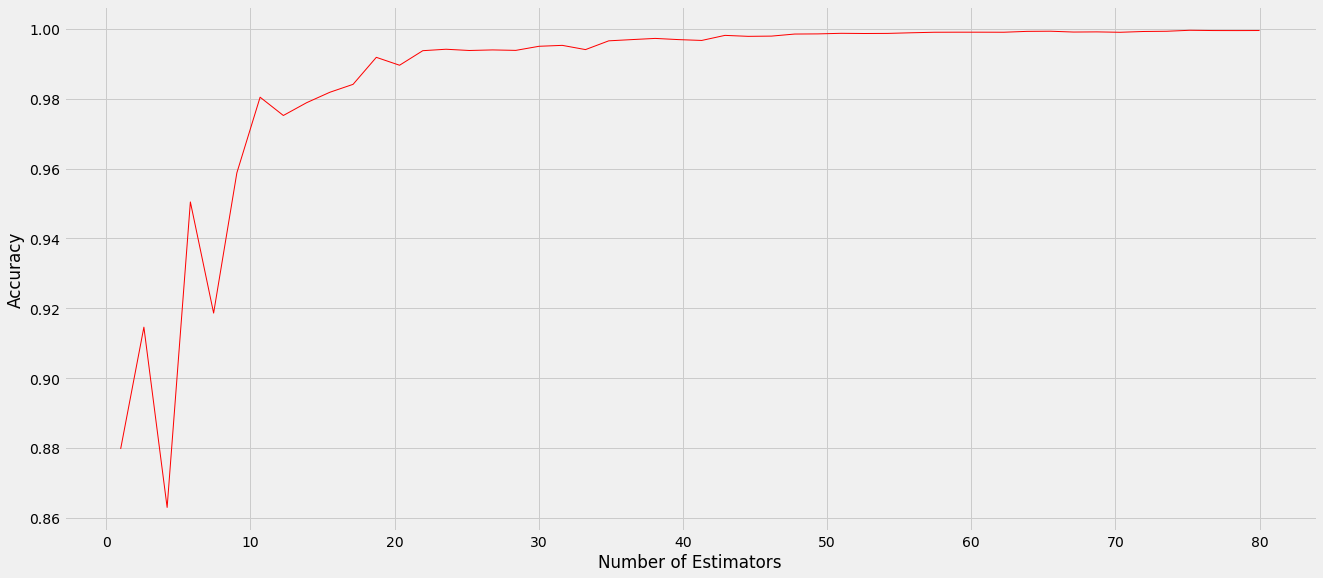

In [28]:
plt.figure(1 , figsize = (20 , 9))

accuracySmooth = make_interp_spline(n_estimators , accuracy)
n_estimatorsSmooth = np.linspace(np.array(n_estimators).min() , np.array(n_estimators).max() , 50)
accuracySmooth = accuracySmooth(n_estimatorsSmooth)

plt.plot(n_estimatorsSmooth , accuracySmooth,'r-' , linewidth=1)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

In [29]:
start = time.time()

AdaBoostCLF = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1) , n_estimators = 100 , 
                              learning_rate = 0.5 , algorithm = 'SAMME.R' , random_state = 0)
    
AdaBoostCLF.fit(xtrain , ytrain)
yPred_AdaBoost = adaBoost.predict(xtest)

end = time.time()

modelName.append('AdaBoost Classifier')
timeTaken.append(end - start)
modelAccuracy.append(accuracy_score(ytest , yPred_AdaBoost))

In [30]:
Report(ytest , yPred_AdaBoost)

Accuracy : 0.9995209963276385 

Confusion Matrix : 

[[ 5326     4]
 [    5 13454]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5330
           1       1.00      1.00      1.00     13459

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



<h1> GradientBoosting Classifier </h1>

In [31]:
accuracy = []
n_estimators = []

for i in range(1,8):
    
    n = i*100
    n_estimators.append(n)
    
    gbClf = GradientBoostingClassifier(learning_rate = 0.2 , n_estimators = n , subsample = 1 , 
                                       criterion = 'mse' , max_depth = 4 , random_state = 0  , max_features = 'sqrt')
    
    gbClf.fit(xtrain , ytrain)
    yPred = gbClf.predict(xtest)
    accuracy.append(accuracy_score(ytest , yPred))
    
    print('GradientBoosting Classifier with n_estimators = {} ------------> Accuracy : {}'.format(n ,accuracy_score(ytest , yPred) ))

GradientBoosting Classifier with n_estimators = 100 ------------> Accuracy : 0.9998935547394753
GradientBoosting Classifier with n_estimators = 200 ------------> Accuracy : 0.9998935547394753
GradientBoosting Classifier with n_estimators = 300 ------------> Accuracy : 0.9998935547394753
GradientBoosting Classifier with n_estimators = 400 ------------> Accuracy : 0.9998935547394753
GradientBoosting Classifier with n_estimators = 500 ------------> Accuracy : 0.9998935547394753
GradientBoosting Classifier with n_estimators = 600 ------------> Accuracy : 0.9998935547394753
GradientBoosting Classifier with n_estimators = 700 ------------> Accuracy : 0.9998935547394753


In [32]:
start = time.time()

gbClf = GradientBoostingClassifier(learning_rate = 0.2 , n_estimators = 100 , subsample = 1 , 
                                   criterion = 'mse' , max_depth = 4 , random_state = 0  , max_features = 'sqrt')
    
gbClf.fit(xtrain , ytrain)
yPred_GradientBoosting = gbClf.predict(xtest)

end = time.time()

modelName.append('GradientBoosting Classifier')
timeTaken.append(end - start)
modelAccuracy.append(accuracy_score(ytest , yPred_GradientBoosting))

In [33]:
Report(ytest , yPred_GradientBoosting)

Accuracy : 0.9998935547394753 

Confusion Matrix : 

[[ 5328     2]
 [    0 13459]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5330
           1       1.00      1.00      1.00     13459

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



<h1> Models Performance </h1>

In [34]:
dict = {'name' : modelName , 'accuracy' : modelAccuracy , 'time taken': timeTaken}
Model_Performance = pd.DataFrame(data = dict)

Model_Performance

,name,accuracy,time taken
0,RandomForest Classifier,0.994837,0.883559
1,ExtraTree Classifier,0.998723,0.020161
2,AdaBoost Classifier,0.999521,6.029527
3,GradientBoosting Classifier,0.999894,4.489763


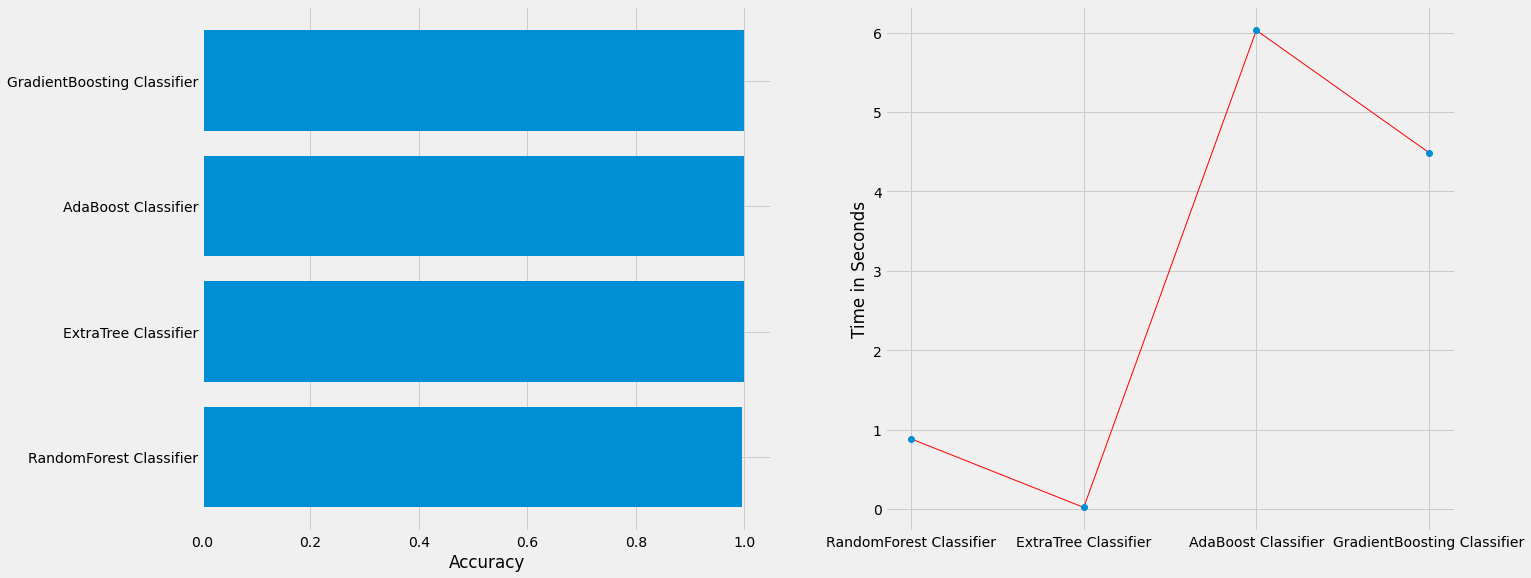

In [35]:
plt.figure(1 , figsize = (20 , 9))

plt.subplot(1 , 2 , 1)
plt.barh(Model_Performance['name'] , Model_Performance['accuracy'])
plt.xlabel('Accuracy')

plt.subplot(1 , 2 , 2)

plt.plot(Model_Performance['name'] , Model_Performance['time taken'] , 'r-' , linewidth = 1)
plt.plot(Model_Performance['name'] , Model_Performance['time taken'] , 'o')
plt.ylabel('Time in Seconds')
plt.show()